##**Introduction**

LendingClub is a US peer-to-peer lending company, headquartered in San Francisco, California. It was the first peer-to-peer lender to register its offerings as securities with the Securities and Exchange Commission (SEC), and to offer loan trading on a secondary market. LendingClub is the world's largest peer-to-peer lending platform.

Solving this case study will give us an idea about how real business problems are solved using EDA and Machine Learning. In this case study, we will also develop a basic understanding of risk analytics in banking and financial services and understand how data is used to minimise the risk of losing money while lending to customers.

📝#**Business Understanding**

You work for the LendingClub company which specialises in lending various types of loans to urban customers. When the company receives a loan application, the company has to make a decision for loan approval based on the applicant’s profile. Two types of risks are associated with the bank’s decision:

If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company
If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to a financial loss for the company
The data given contains the information about past loan applicants and whether they ‘defaulted’ or not. The aim is to identify patterns which indicate if a person is likely to default, which may be used for takin actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc.

When a person applies for a loan, there are two types of decisions that could be taken by the company:

**Loan accepted**: If the company approves the loan, there are 3 possible scenarios described below:

**Fully paid**: Applicant has fully paid the loan (the principal and the interest rate)

**Current**: Applicant is in the process of paying the instalments, i.e. the tenure of the loan is not yet completed. These candidates are not labelled as 'defaulted'.

**Charged-off**: Applicant has not paid the instalments in due time for a long period of time, i.e. he/she has defaulted on the loan

**Loan rejected**: The company had rejected the loan (because the candidate does not meet their requirements etc.).

 Since the loan was rejected, there is no transactional history of those applicants with the company and so this data is not available with the company (and thus in this dataset)

🎯 Business Objectives

LendingClub is the largest online loan marketplace, facilitating personal loans, business loans, and financing of medical procedures. Borrowers can easily access lower interest rate loans through a fast online interface.

Like most other lending companies, lending loans to ‘risky’ applicants is the largest source of financial loss (called credit loss). The credit loss is the amount of money lost by the lender when the borrower refuses to pay or runs away with the money owed. In other words, borrowers who defaultcause the largest amount of loss to the lenders. In this case, the customers labelled as 'charged-off' are the 'defaulters'.

If one is able to identify these risky loan applicants, then such loans can be reduced thereby cutting down the amount of credit loss. Identification of such applicants using EDA and machine learning is the aim of this case study.

In other words, the company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default. The company can utilise this knowledge for its portfolio and risk assessment.

To develop your understanding of the domain, you are advised to independently research a little about risk analytics (understanding the types of variables and their significance should be enough).


💾 **Data Description**

Loan Stat New	Description

0) **loan_amnt**	: The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.

1) **term** :	The number of payments on the loan. Values are in months and can be either 36 or 60.

2) **int_rate** :	Interest Rate on the loan.

3) **installment** :	The monthly payment owed by the borrower if the loan originates.

4) **grade** :	LC assigned loan grade

5) **sub_grade** :	LC assigned loan subgrade

6) **emp_title** : The job title supplied by the Borrower when applying for the loan.

7) **emp_length** :	Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.

8) **home_ownership** :	The home ownership status provided by the borrower during registration or obtained from the credit report. Our values are: RENT, OWN, MORTGAGE, OTHER

9) **annual_inc** :	The self-reported annual income provided by the borrower during registration.

10)	**verification_status**	: Indicates if income was verified by LC, not verified, or if the income source was verified.

11)	**issue_d** :	The month which the loan was funded.

12)	**loan_status** :	Current status of the loan.

13)	**purpose** :	A category provided by the borrower for the loan request.

14)	**title** :	The loan title provided by the borrower.

15)	**zip_code** :	The first 3 numbers of the zip code provided by the borrower in the loan application.

16)	**addr_state** :	The state provided by the borrower in the loan application.

17)	**dti** :	A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.

18)	**earliest_cr_line**	: The month the borrower's earliest reported credit line was opened.

19)	**open_acc** :	The number of open credit lines in the borrower's credit file.

20)	**pub_rec**	: Number of derogatory public records.

21)	**revol_bal** :	Total credit revolving balance.

22)	**revol_util** :	Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.

23)	**total_acc**	: The total number of credit lines currently in the borrower's credit file.

24)	**initial_list_status**	: The initial listing status of the loan. Possible values are – W, F.

25)	**application_type** :	Indicates whether the loan is an individual application or a joint application with two co-borrowers.

26)	**mort_acc** :	Number of mortgage accounts.

27)	**pub_rec_bankruptcies** :	Number of public record bankruptcies.

In [1]:
!pip install -q hvplot panel

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 175.5/175.5 kB 7.0 MB/s eta 0:00:00


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import hvplot.pandas
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import MinMaxScaler

from sklearn.metrics import (accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve, auc,  ConfusionMatrixDisplay, RocCurveDisplay)

from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier

import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import AUC

pd.set_option('display.float','{:.2f}'.format)
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 50)

In [3]:
df = pd.read_csv("/content/lending_club_loan_two.csv")
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.00,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.00,Not Verified,Jan-2015,Fully Paid,vacation,Vacation,26.24,Jun-1990,16.00,0.00,36369.00,41.80,25.00,w,INDIVIDUAL,0.00,0.00,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.00,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.00,Not Verified,Jan-2015,Fully Paid,debt_consolidation,Debt consolidation,22.05,Jul-2004,17.00,0.00,20131.00,53.30,27.00,f,INDIVIDUAL,3.00,0.00,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.00,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.00,Source Verified,Jan-2015,Fully Paid,credit_card,Credit card refinancing,12.79,Aug-2007,13.00,0.00,11987.00,92.20,26.00,f,INDIVIDUAL,0.00,0.00,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.00,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.00,Not Verified,Nov-2014,Fully Paid,credit_card,Credit card refinancing,2.60,Sep-2006,6.00,0.00,5472.00,21.50,13.00,f,INDIVIDUAL,0.00,0.00,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375.00,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.00,Verified,Apr-2013,Charged Off,credit_card,Credit Card Refinance,33.95,Mar-1999,13.00,0.00,24584.00,69.80,43.00,f,INDIVIDUAL,1.00,0.00,"679 Luna Roads\r\nGreggshire, VA 11650"


In [4]:
df.describe()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
count,396030.00,396030.00,396030.00,396030.00,396030.00,396030.00,396030.00,396030.00,395754.00,396030.00,358235.00,395495.00
mean,14113.89,13.64,431.85,74203.18,17.38,11.31,0.18,15844.54,53.79,25.41,1.81,0.12
std,8357.44,4.47,250.73,61637.62,18.02,5.14,0.53,20591.84,24.45,11.89,2.15,0.36
min,500.00,5.32,16.08,0.00,0.00,0.00,0.00,0.00,0.00,2.00,0.00,0.00
25%,8000.00,10.49,250.33,45000.00,11.28,8.00,0.00,6025.00,35.80,17.00,0.00,0.00
50%,12000.00,13.33,375.43,64000.00,16.91,10.00,0.00,11181.00,54.80,24.00,1.00,0.00
75%,20000.00,16.49,567.30,90000.00,22.98,14.00,0.00,19620.00,72.90,32.00,3.00,0.00
max,40000.00,30.99,1533.81,8706582.00,9999.00,90.00,86.00,1743266.00,892.30,151.00,34.00,8.00


# Exploratory Data Analysis

Overall Goal: Get an understanding for which variables are important, view summary statistics, and visualize the data.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394274 non-null  object 
 15  

In [6]:
df.shape

(396030, 27)

In [7]:
df['loan_status'].value_counts().hvplot.bar(title="Loan Status Counts", xlabel="Loan Status", ylabel="Count", width=500, height=350)

:Bars   [loan_status]   (count)

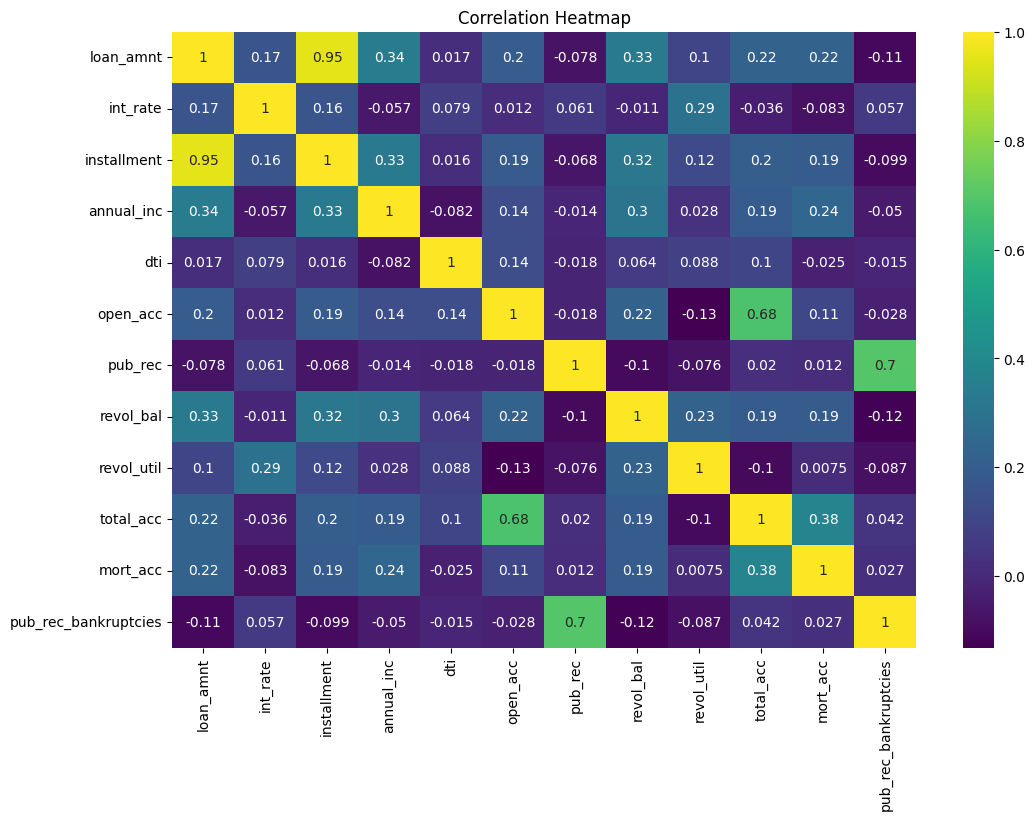

In [8]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.select_dtypes(include=np.number).corr(), annot=True, cmap='viridis')
plt.title('Correlation Heatmap')
plt.show()

**Notice**

We noticed almost perfect correlation between "loan-amnt" the "installment" feature.

We'll explore this features further. Print out their descriptions and perform a scatterplot between them.

✅ loan_amnt & installment


*   installment: The monthly payment owed by the borrower if the loan originates.
*   loan_amnt: The listed amount of the loan applied for by the borrower.If at some point in time, the creditdepartment reduces the loan amount, then it will be reflected in this value.





In [9]:
installment = df.hvplot.hist(
    y='installment', by='loan_status', subplots=False,
    width=350, height=400, bins=50, alpha=0.4,
    title="Installment by Loan Status",
    xlabel='Installment', ylabel='Counts', legend='top'
)

loan_amnt = df.hvplot.hist(
    y='loan_amnt', by='loan_status', subplots=False,
    width=350, height=400, bins=50, alpha=0.4,
    title="Loan Amount by Loan Status",
    xlabel='Loan Amount', ylabel='Counts', legend='top'
)

installment + loan_amnt

:Layout
   .NdOverlay.I  :NdOverlay   [loan_status]
      :Histogram   [installment]   (Count)
   .NdOverlay.II :NdOverlay   [loan_status]
      :Histogram   [loan_amnt]   (Count)

In [10]:
loan_amnt_box = df.hvplot.box(
    y='loan_amnt', by='loan_status', subplots=False,
    width=300, height=350,
    title="Loan Status by Loan Amount  ",
    xlabel='Loan Status', ylabel='Loan Amount'
)

installment_box = df.hvplot.box(
    y='installment', by='loan_status', subplots=False,
    width=300, height=350,
    title="Loan Status by Installment",
    xlabel='Loan Status', ylabel='Installment'
)

loan_amnt_box + installment_box

:Layout
   .BoxWhisker.I  :BoxWhisker   [loan_status]   (loan_amnt)
   .BoxWhisker.II :BoxWhisker   [loan_status]   (installment)

In [11]:
df.groupby(by='loan_status')['loan_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,77673.00,15126.30,8505.09,1000.00,8525.00,14000.00,20000.00,40000.00
Fully Paid,318357.00,13866.88,8302.32,500.00,7500.00,12000.00,19225.00,40000.00


✔ grade & sub_grade


*   grade: LC assigned loan grade
*   sub_grade: LC assigned loan subgrade

-> Let's explore the Grade and SubGrade columns that LendingClub attributes to the loans.

What are the unique possible grade & sub_grade?



In [12]:
print(f"GRADE unique: {df.grade.unique()}")
print(f"SUB_GRADE unique: {df.sub_grade.unique()}")

GRADE unique: ['B' 'A' 'C' 'E' 'D' 'F' 'G']
SUB_GRADE unique: ['B4' 'B5' 'B3' 'A2' 'C5' 'C3' 'A1' 'B2' 'C1' 'A5' 'E4' 'A4' 'A3' 'D1'
 'C2' 'B1' 'D3' 'D5' 'D2' 'E1' 'E2' 'E5' 'F4' 'E3' 'D4' 'G1' 'F5' 'G2'
 'C4' 'F1' 'F3' 'G5' 'G4' 'F2' 'G3']


In [13]:
# fully_paid = df.loc[df['loan_status']]=='Fully Paid', 'grade'].value_counts().hvplot.bar()

# charged_off = df.loc[df['loan_status']]=='Charged Off', 'grade'].value_counts().hvplot.bar()

# gardes = (fully_paid * charged_off).opts(
#    title="Loan Status by Grade", xlabel='Grades', ylabel='Count',
# width=500, height=450, legend_cols=2,
# legend_position='top_right'
# )

# fully_paid = df.loc[df['loan_status']]=='Fully Paid', 'sub_grade'].value_counts().hvplot.bar()
# charged_off = df.loc[df['loan_status']]=='Charged Off', 'grade'].value_counts().hvplot.bar()

# sub_grades = (fully_paid * charged_off).opts(
#     title="Loan Status by Grade", xlabel='Grades', ylabel='Count',
#   width=500, height=450, legend_cols=2, legend_position='top_right',
#  shared_axes=False
# )

# grades + sub_grades

In [14]:
fully_paid = df.loc[df['loan_status']=='Fully Paid', 'grade'].value_counts().hvplot.bar()
charged_off = df.loc[df['loan_status']=='Charged Off', 'grade'].value_counts().hvplot.bar()

(fully_paid * charged_off).opts(
   title="Loan Status by Grade", xlabel='Grades', ylabel='Count',
 width=500, height=450, legend_cols=2,
 legend_position='top_right', xrotation=90
)

:Overlay
   .Bars.Count.I  :Bars   [grade]   (count)
   .Bars.Count.II :Bars   [grade]   (count)

In [15]:
fully_paid = df.loc[df['loan_status']=='Fully Paid', 'sub_grade'].value_counts().hvplot.bar()
charged_off = df.loc[df['loan_status']=='Charged Off', 'sub_grade'].value_counts().hvplot.bar()

(fully_paid * charged_off).opts(
   title="Loan Status by Grade", xlabel='Grades', ylabel='Count',
 width=500, height=400, legend_cols=2,
 legend_position='top_right', xrotation=90
)

:Overlay
   .Bars.Count.I  :Bars   [sub_grade]   (count)
   .Bars.Count.II :Bars   [sub_grade]   (count)

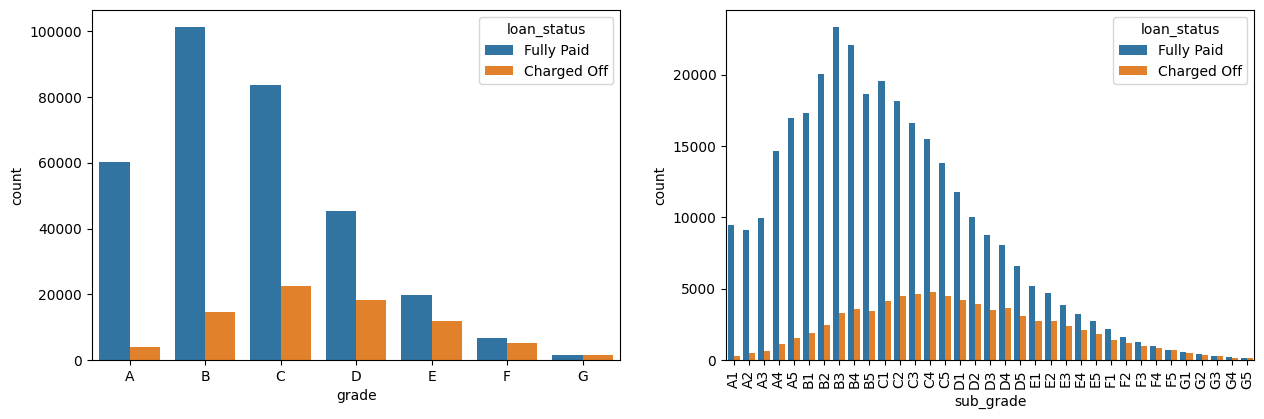

In [16]:
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
grade = sorted(df.grade.unique().tolist())
sns.countplot(x='grade', data=df, hue='loan_status', order=grade)

plt.subplot(2, 2, 2)
sub_grade = sorted(df.sub_grade.unique().tolist())
g = sns.countplot(x='sub_grade', data=df, hue='loan_status', order=sub_grade)
g.set_xticklabels(g.get_xticklabels(), rotation=90);

-> It looks like F and G subgrades don't get paid back that often. Isolating those and recreate the countplot just for those subgrades.

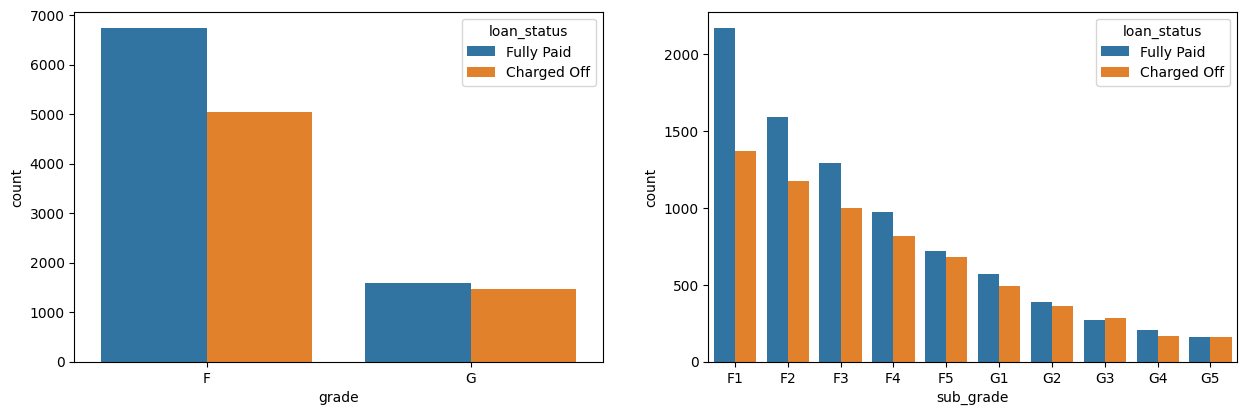

In [17]:
data = df[(df.grade == 'F') | (df.grade == 'G')]

plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
grade = sorted(data.grade.unique().tolist())
sns.countplot(x='grade', data=data, hue='loan_status', order=grade)

plt.subplot(2, 2, 2)
sub_grade = sorted(data.sub_grade.unique().tolist())
g = sns.countplot(x='sub_grade', data=data, hue='loan_status', order=sub_grade)

✅ term, home_ownership, verification_status & purpose



*   **term**: The number of payments on the loan.Values are in months and can be either 36 or 60.
*   **home_ownership**: The home ownership status provided by the borrower during registration or obtained from the credit report. Our values are: RENT, OWN, MORTGAGE,OTHER.

*   **verification_status**: Indicates if income was verified by LC, not verified, or if the income source was verified.
*   **purpose**: A category provided by the borrower for the loan request.





In [18]:
df['home_ownership'].value_counts()

,count
home_ownership,
MORTGAGE,198348
RENT,159790
OWN,37746
OTHER,112
NONE,31
ANY,3


In [19]:
fully_paid = df.loc[df['loan_status']=='Fully Paid', 'home_ownership'].value_counts().hvplot.bar()
charged_off = df.loc[df['loan_status']=='Charged Off', 'home_ownership'].value_counts().hvplot.bar()

home_ownership_count = (fully_paid * charged_off).opts(
   title="Loan Status by Grade", xlabel='Home Ownership', ylabel='Count',
   width=350, height=350, legend_cols=2,
legend_position='top_right'
).opts(xrotation=90)

home_ownership = df.home_ownership.value_counts().hvplot.bar(
    title="Loan Status by Grade", xlabel="Home Ownership", ylabel="Count",
    width=350, height=350, legend='top'
    ).opts(xrotation=90)

(home_ownership_count + home_ownership)





:Layout
   .Overlay.Count :Overlay
      .Bars.Count.I  :Bars   [home_ownership]   (count)
      .Bars.Count.II :Bars   [home_ownership]   (count)
   .Bars.Count    :Bars   [home_ownership]   (count)

In [20]:
df.loc[(df.home_ownership == 'ANY') | (df.home_ownership == 'NONE'), 'home_ownership'] = 'OTHER'
df.home_ownership.value_counts()

,count
home_ownership,
MORTGAGE,198348
RENT,159790
OWN,37746
OTHER,146


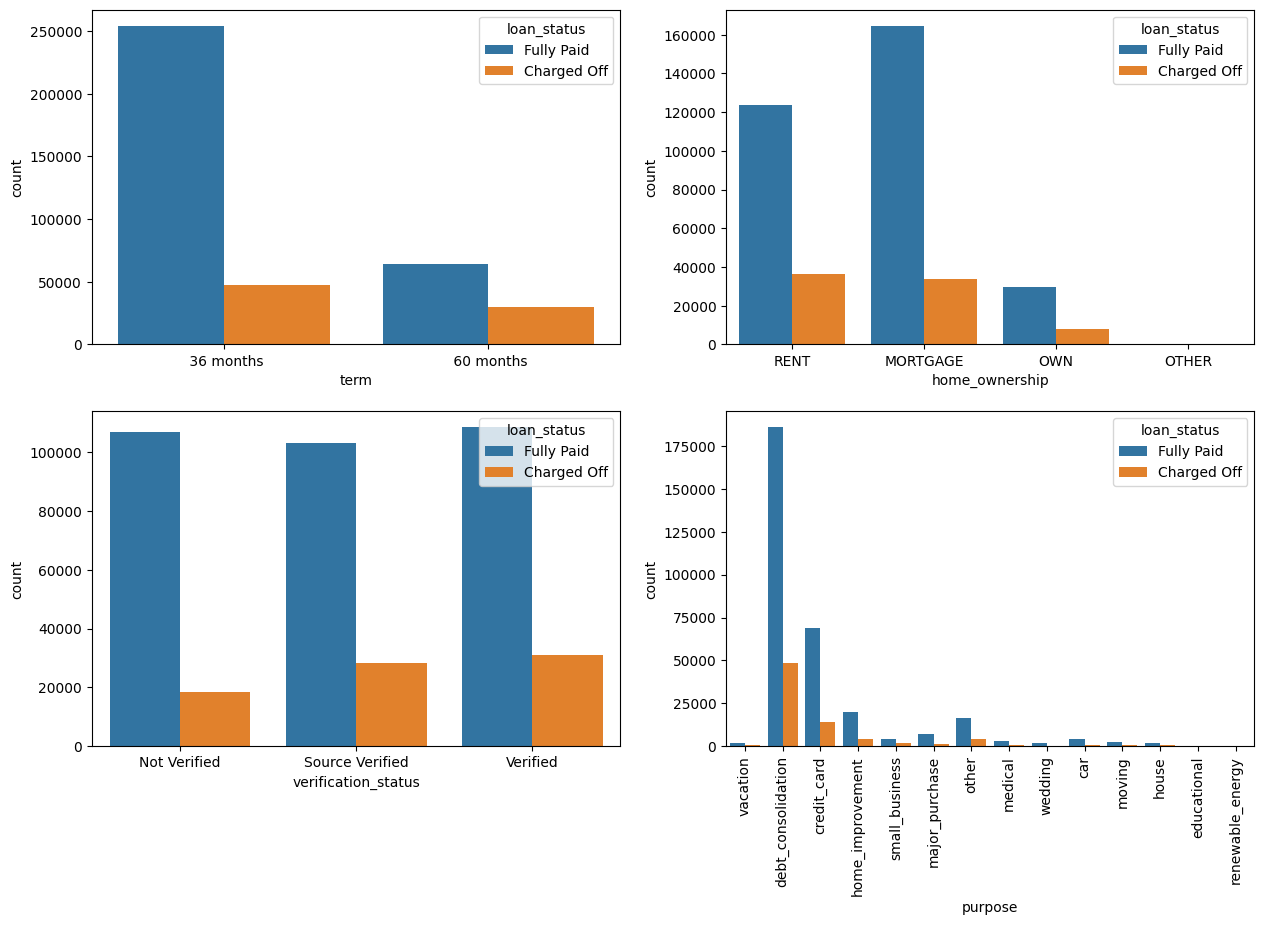

In [21]:
plt.figure(figsize=(15, 20))

plt.subplot(4, 2, 1)
sns.countplot(x='term', data=df, hue='loan_status')

plt.subplot(4, 2, 2)
sns.countplot(x='home_ownership', data=df, hue='loan_status')

plt.subplot(4, 2, 3)
sns.countplot(x='verification_status', data=df, hue='loan_status')

plt.subplot(4, 2, 4)
g = sns.countplot(x='purpose', data=df, hue='loan_status')
g.set_xticklabels(g.get_xticklabels(), rotation=90);

In [22]:
df.loc[df['home_ownership']=='OTHER','loan_status'].value_counts()

,count
loan_status,
Fully Paid,123
Charged Off,23


✅ int_rate & annual_inc


*   int_rate: Interest Rate on the loan
*   annual_inc: The self-reported annual income provided by the borrower during registration.



In [23]:
int_rate = df.hvplot.hist(
    y='int_rate', by='loan_status', alpha=0.3,
    width=350, height=400,
    title="Loan Status by Interest Rate",
    xlabel='Interest Rate', ylabel='Loans Counts', legend='top'
)

annual_inc = df.hvplot.hist(
    y='annual_inc', by='loan_status', bins=50, alpha=0.3,
    width=350, height=400,
    title="Loan Status by Annual Income",
    xlabel='Annual Income', ylabel='Loans Counts', legend='top'
).opts(xrotation=45)

int_rate + annual_inc

:Layout
   .NdOverlay.I  :NdOverlay   [loan_status]
      :Histogram   [int_rate]   (Count)
   .NdOverlay.II :NdOverlay   [loan_status]
      :Histogram   [annual_inc]   (Count)

In [24]:
df[df.annual_inc <= 250000].hvplot.hist(
    y='annual_inc', by='loan_status', bins=50, alpha=0.3,
    width=500, height=400,
    title="Loan Status by Annual Income (<= 250000/Year)",
    xlabel='Annual Income', ylabel='Loans Counts', legend='top'
).opts(xrotation=45)

:NdOverlay   [loan_status]
   :Histogram   [annual_inc]   (Count)

In [25]:
print((df[df.annual_inc >= 250000].shape[0] / df.shape[0]) * 100)
print((df[df.annual_inc >= 1000000].shape[0] / df.shape[0]) * 100)

1.0294674645860162
0.018937959245511705


In [26]:
df.loc[df.annual_inc >= 1000000, 'loan_status'].value_counts()

,count
loan_status,
Fully Paid,65
Charged Off,10


In [27]:
df.loc[df.annual_inc >= 250000, 'loan_status'].value_counts()

,count
loan_status,
Fully Paid,3509
Charged Off,568




*   It seems that loans with high interest rate are more likely to be unpaid.
*   Only 75(less then) borrowers have an annual income more than 1 million, and 4077



✅ emp_title & emp_length


*   emp_title: The job title supplied by the borrower when applying for the loan.
*   emp_length: Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.



In [28]:
print(df.emp_title.isna().sum())
print(df.emp_title.nunique())

22927
173105


In [29]:
df['emp_title'].value_counts()[:20]

,count
emp_title,
Teacher,4389
Manager,4250
Registered Nurse,1856
RN,1846
Supervisor,1830
Sales,1638
Project Manager,1505
Owner,1410
Driver,1339


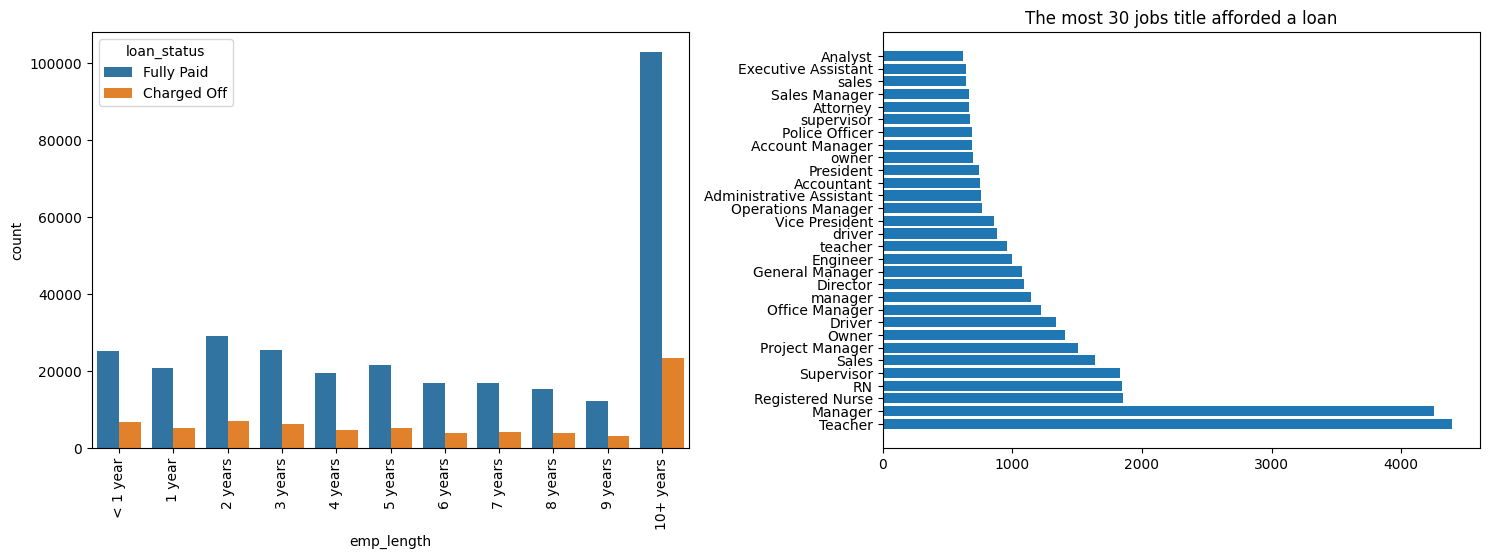

In [30]:
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
order = ['< 1 year', '1 year', '2 years', '3 years', '4 years', '5 years', '6 years', '7 years', '8 years', '9 years', '10+ years']
g = sns.countplot(x='emp_length', data=df, hue='loan_status', order=order)
g.set_xticklabels(g.get_xticklabels(), rotation=90);

plt.subplot(2, 2, 2)
plt.barh(df.emp_title.value_counts()[:30].index, df.emp_title.value_counts()[:30].values)
plt.title('The most 30 jobs title afforded a loan')
plt.tight_layout()

✅ issue_d, earliest_cr_line

*   issue_d: This month which the loan was funded.
*   earliest_cr_line: The month the borrower's earliest reported credit line was opened.



In [31]:
# df.hvplot.line(x='issue_d', y='loan_status')

In [32]:
df['earliest_cr_line'].value_counts()

,count
earliest_cr_line,
Oct-2000,3017
Aug-2000,2935
Oct-2001,2896
Aug-2001,2884
Nov-2000,2736
...,...
Feb-1957,1
Nov-1950,1
May-1955,1


In [33]:
df['issue_d'] = pd.to_datetime(df['issue_d'])
df['earliest_cr_line'] = pd.to_datetime(df['earliest_cr_line'])

In [34]:
fully_paid = df.loc[df['loan_status']=='Fully Paid', 'issue_d'].hvplot.hist(bins=35)
charged_off = df.loc[df['loan_status']=='Charged Off', 'issue_d'].hvplot.hist(bins=35)

# fully_paid * charged_off
loan_issue_date = (fully_paid * charged_off).opts(
    title="Loan Status by Loan Issue Date", xlabel='Loan Issue Date', ylabel='Count',
    width=350, height=350, legend_cols=2,
    legend_position='top_right'
).opts(xrotation=45)

fully_paid = df.loc[df['loan_status']=='Fully Paid', 'earliest_cr_line'].hvplot.hist(bins=35)
charged_off = df.loc[df['loan_status']=='Charged Off', 'earliest_cr_line'].hvplot.hist(bins=35)

earliest_cr_line = (fully_paid * charged_off).opts(
    title = "Loan Status by earliest_cr_line", xlabel='earliest_cr_line', ylabel='Count',
    width=350, height=350, legend_cols=2,
    legend_position='top_right'
).opts(xrotation=45)

loan_issue_date + earliest_cr_line

:Layout
   .Overlay.I  :Overlay
      .Histogram.I  :Histogram   [issue_d]   (Count)
      .Histogram.II :Histogram   [issue_d]   (Count)
   .Overlay.II :Overlay
      .Histogram.I  :Histogram   [earliest_cr_line]   (Count)
      .Histogram.II :Histogram   [earliest_cr_line]   (Count)

✔ title

*   title: The loan title provided by the borrower




In [35]:
df.title.isna().sum()

np.int64(1756)

In [36]:
df['title'] = df.title.str.lower()

In [37]:
df.title.value_counts()[:10]

,count
title,
debt consolidation,168108
credit card refinancing,51781
home improvement,17117
other,12993
consolidation,5583
major purchase,4998
debt consolidation loan,3513
business,3017
medical expenses,2820


#**title** will be removed because we have the purpose column with is generated from it.

✔ dti, open_acc, revol_bal, revol_util & total_acc


*   dti: A ratio calculated using the borrower's total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower's self reported monthly income.
*   open_acc: The number of open credit lines in the borrower's credit file.
*   revol_bal: Total credit revolving balance
*   revol_uti: Revolving the utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.
*   total_acc: The total number of credit lines currently in the borrower's credit file.








In [38]:
df.dti.value_counts()

,count
dti,
0.00,313
14.40,310
19.20,302
16.80,301
18.00,300
...,...
47.05,1
46.52,1
1622.00,1


In [39]:
dti = df.hvplot.hist(
    y='dti', bins=50, width=350, height=350,
    title="dti Distribution", xlabel='dti',
    ylabel='Count'
    )

sub_dti = df[df['dti']<=50].hvplot.hist(
    y='dti', bins=50, width=350, height=350,
    title="dti (<=30) Distribution", xlabel='dti',
    ylabel='Count', shared_axes=False
)

dti + sub_dti

:Layout
   .Histogram.I  :Histogram   [dti]   (Count)
   .Histogram.II :Histogram   [dti]   (Count)

In [40]:
print(df[df['dti']>=40].shape)

(296, 27)


In [41]:
df.loc[df['dti']>=50, 'loan_status'].value_counts()

,count
loan_status,
Fully Paid,26
Charged Off,9


In [42]:
dti = df[df['dti']<=50].hvplot.hist(
    y='dti', by='loan_status', bins=50, width=300, height=350,
    title="dti (<=30) Distribution", xlabel='dti',
    ylabel='Count', alpha=0.3, legend='top'
)

title="Loan Status by The number of open credit lines"

open_acc = df.hvplot.hist(
    y='open_acc', by='loan_status', bins=50, width=300, height=350,
    title=title, xlabel='The number of open credit lines', ylabel='Count',
    alpha=0.4, legend='top'
)

title="Loan Status by The total number of credit lines"

total_acc = df.hvplot.hist(
    y='total_acc', by='loan_status', bins=50, width=300, height=350,
    title=title, xlabel='The total number of credit lines', ylabel='Count',
    alpha=0.4, legend='top'
)

dti + open_acc + total_acc

:Layout
   .NdOverlay.I   :NdOverlay   [loan_status]
      :Histogram   [dti]   (Count)
   .NdOverlay.II  :NdOverlay   [loan_status]
      :Histogram   [open_acc]   (Count)
   .NdOverlay.III :NdOverlay   [loan_status]
      :Histogram   [total_acc]   (Count)

In [43]:
print(df.shape)
print(df[df.open_acc > 40].shape)

(396030, 27)
(217, 27)


In [44]:
print(df.shape)
print(df[df.total_acc > 80].shape)

(396030, 27)
(266, 27)


In [45]:
print(df.shape)
print(df[df.revol_util > 120].shape)

(396030, 27)
(27, 27)


In [46]:
title = " Loan Status by Total credit revolving balance"

revol_bal = df.hvplot.hist(
    y='revol_bal', by='loan_status', bins=50, width=300, height=350,
    title=title, xlabel='Total credit revolving balance', ylabel='Count',
    alpha=0.4, legend='top'
)

title = "Loan Status by Total credit revolving balance (<250000)"

sub_revol_bal = df[df['revol_bal']<=250000].hvplot.hist(
    y='revol_bal', by='loan_status', bins=50, width=350, height=400,
    title=title, xlabel='Total credit revolving balance', ylabel='Count',
    alpha=0.4, legend='top', shared_axes=False
).opts(xrotation=45)

revol_bal + sub_revol_bal

:Layout
   .NdOverlay.I  :NdOverlay   [loan_status]
      :Histogram   [revol_bal]   (Count)
   .NdOverlay.II :NdOverlay   [loan_status]
      :Histogram   [revol_bal]   (Count)

In [47]:
title = " Loan Status by Revolving line utilization rate"

revol_util = df.hvplot.hist(
    y='revol_util', by='loan_status', bins=50, width=350, height=400,
    title=title, xlabel='Revolving line utilization rate', ylabel='Count',
    alpha=0.4, legend='top'
)

title = "Loan Status by Revolving line utilization rate(<120)"

sub_revol_util = df[df['revol_bal']<=120].hvplot.hist(
    y='revol_bal', by='loan_status', bins=50, width=350, height=400,
    title=title, xlabel='Revolving line utilization rate', ylabel='Count',
    alpha=0.4, legend='top'
).opts(xrotation=45)

revol_bal + sub_revol_util

:Layout
   .NdOverlay.I  :NdOverlay   [loan_status]
      :Histogram   [revol_bal]   (Count)
   .NdOverlay.II :NdOverlay   [loan_status]
      :Histogram   [revol_bal]   (Count)

In [48]:
df[df.revol_util > 200]

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
137211,3500.00,36 months,12.49,117.08,B,B4,Budget Analyst,10+ years,RENT,45000.00,Verified,2014-04-01,Fully Paid,debt_consolidation,debt consolidation,14.67,1998-10-01,2.00,0.00,2677.00,892.30,9.00,f,INDIVIDUAL,0.00,0.00,"12506 Connie Burg\r\nVelasquezfort, TN 00813"


In [49]:
print(df.shape)
print(df[df.revol_bal > 250000].shape)

(396030, 27)
(397, 27)


In [50]:
title = " Loan Status by Total credit revolving balance"

revol_util = df.hvplot.hist(
    y='revol_util', by='loan_status', bins=50, width=350, height=400,
    title=title, xlabel='Revolving line utilization rate', ylabel='Count',
    alpha=0.4, legend='top'
)

title = "Loan Status by Total revolving balance (<250000)"

sub_revol_bal = df[df['revol_bal']<=250000].hvplot.hist(
    y='revol_bal', by='loan_status', bins=50, width=350, height=400,
    title=title, xlabel='Total credit revolving balance', ylabel='Count',
    alpha=0.4, legend='top', shared_axes=False
).opts(xrotation=45)

revol_bal + sub_revol_bal

:Layout
   .NdOverlay.I  :NdOverlay   [loan_status]
      :Histogram   [revol_bal]   (Count)
   .NdOverlay.II :NdOverlay   [loan_status]
      :Histogram   [revol_bal]   (Count)

In [51]:
df.loc[df.revol_bal >= 250000, 'loan_status'].value_counts()

,count
loan_status,
Fully Paid,351
Charged Off,46



*   It seems that smaller the dti the more likely that the loan will not be paid.
*   Only 217 borrower have more than 40 open credit lines.
*   Only 266 borrower have more than 80 credit line in the borrower credit file.





✔ pub_rec, initial_list_status,application_type,mort_acc,& pub_rec_bankruptices

*   pub_rec: Number of derogatory public records.
*   initial_list_status: The initial listing status of the loan. Possible values are - W,F
*   application_type: Indicates whether the loan is an individual application or a joint application with two co-borrowers
*   mort_acc : Number of mortgage accounts
*   pub_rec_bankruptcies: Number of public record bankruptcies





In [52]:
xlabel = 'Number of derogatory public records'
title = "Loan Status by Number of derogatory public records"

fully_paid = df.loc[df['loan_status']=='Fully Paid', 'pub_rec'].value_counts().hvplot.bar()
charged_off = df.loc[df['loan_status']=='Charged Off', 'pub_rec'].value_counts().hvplot.bar()

(fully_paid * charged_off).opts(
    title=title, xlabel=xlabel, ylabel='Count',
    width=400, height=400, legend_cols=2,
    legend_position='top_right'
)

:Overlay
   .Bars.Count.I  :Bars   [pub_rec]   (count)
   .Bars.Count.II :Bars   [pub_rec]   (count)

In [53]:
xlabel = "The initial listing status of the loan"
title = "Loan Status by The initial listing status of the loan"

fully_paid = df.loc[df['loan_status']=='Fully Paid', 'initial_list_status'].value_counts().hvplot.bar()
charged_off = df.loc[df['loan_status']=='Charged Off', 'initial_list_status'].value_counts().hvplot.bar()

(fully_paid * charged_off).opts(
    title=title, xlabel=xlabel, ylabel='Count',
    width=400, height=400, legend_cols=2,
    legend_position='top_right'
)

:Overlay
   .Bars.Count.I  :Bars   [initial_list_status]   (count)
   .Bars.Count.II :Bars   [initial_list_status]   (count)

In [54]:
fully_paid = df.loc[df['loan_status']=='Fully Paid', 'application_type'].value_counts().hvplot.bar()
charged_off = df.loc[df['loan_status']=='Charged Off', 'application_type'].value_counts().hvplot.bar()

(fully_paid * charged_off).opts(
    title="Loan Status by Application Type", xlabel='Application Type', ylabel='Count',
    width=400, height=400, legend_cols=2,
    legend_position='top_right'
)

:Overlay
   .Bars.Count.I  :Bars   [application_type]   (count)
   .Bars.Count.II :Bars   [application_type]   (count)

In [55]:
xlabel = "Number of public record bankruptcies"
title = "Loan Status by The Number of public record bankruptcies"

fully_paid = df.loc[df['loan_status']=='Fully Paid', 'pub_rec_bankruptcies'].value_counts().hvplot.bar()
charged_off = df.loc[df['loan_status']=='Charged Off', 'pub_rec_bankruptcies'].value_counts().hvplot.bar()

(fully_paid * charged_off).opts(
    title=title, xlabel=xlabel, ylabel='Count',
    width=400, height=400, legend_cols=2,
    legend_position='top_right'
)

:Overlay
   .Bars.Count.I  :Bars   [pub_rec_bankruptcies]   (count)
   .Bars.Count.II :Bars   [pub_rec_bankruptcies]   (count)

In [56]:
def pub_rec(number):
    if number == 0.0:
        return 0
    else:
        return 1

def mort_acc(number):
    if number == 0.0:
       return 0
    elif number >= 1.0:
       return 1
    else:
       return number

def pub_rec_bankruptcies(number):
    if number == 0.0:
       return 0
    elif number >= 1.0:
       return 1
    else:
       return number

In [57]:
df['pub_rec'] = df.pub_rec.apply(pub_rec)
df['mort_acc'] = df.mort_acc.apply(mort_acc)
df['pub_rec_bankruptcies'] = df.pub_rec_bankruptcies.apply(pub_rec_bankruptcies)

<Axes: xlabel='pub_rec_bankruptcies', ylabel='count'>

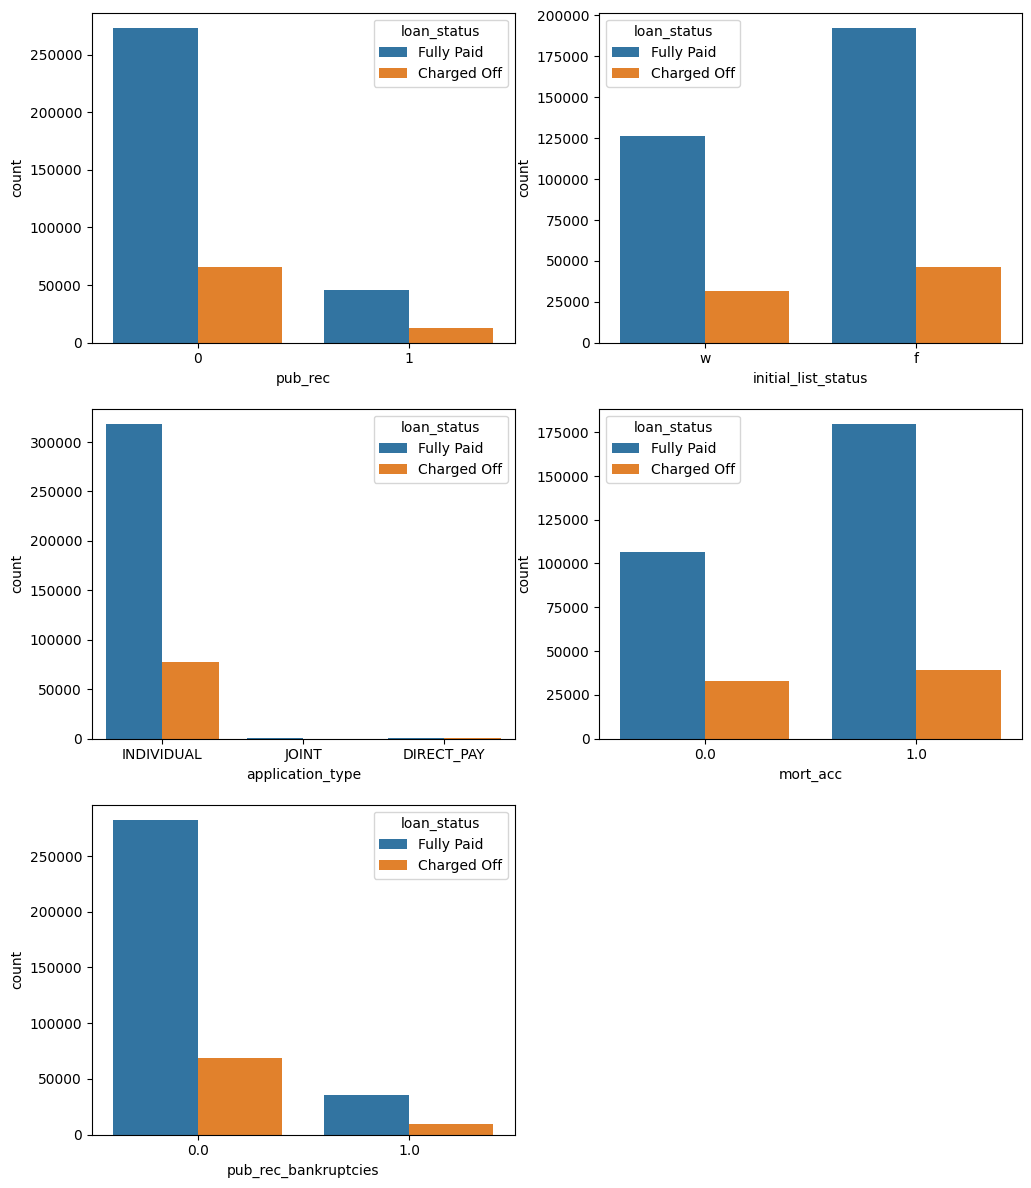

In [58]:
plt.figure(figsize=(12, 30))

plt.subplot(6, 2, 1)
sns.countplot(x='pub_rec', data=df, hue='loan_status')

plt.subplot(6, 2, 2)
sns.countplot(x='initial_list_status', data=df, hue='loan_status')

plt.subplot(6, 2, 3)
sns.countplot(x='application_type', data=df, hue='loan_status')

plt.subplot(6, 2, 4)
sns.countplot(x='mort_acc', data=df, hue='loan_status')

plt.subplot(6, 2, 5)
sns.countplot(x='pub_rec_bankruptcies', data=df, hue='loan_status')

📈 # **How numeric features correlate with the target variable?**

In [59]:
df['loan_status'] = df.loan_status.map({'Fully Paid': 1, 'Charged Off': 0})

In [60]:
df.select_dtypes(include=np.number).corr()['loan_status'].drop('loan_status').sort_values().hvplot.barh(
    width=600, height=400,
    title="Correlation between Loan status and Numeric Features",
    ylabel='Correlation', xlabel='Numerical Features'
)

:Bars   [index]   (loan_status)

#**Conclusion**:

We notice that, there are broadly three types of features:

*  1.Features related to the applicant (demographic variables such as occupation,employment details,etc.),
*  2.Features related to loan characteristics (amount of loan, interest rate, purpose of loan etc.)



# Outliers Detection and Removing

🔃 #Data PreProcessing

Goals:

*  Remove or fill any missing data.
*  Remove unnecessary or repetitive features.
*  Convert categorical string features to dummy variables.



In [61]:
# The length of the data
print(f"The Length of the data: {df.shape}")

The Length of the data: (396030, 27)


In [62]:
# Missing Values
for column in df.columns:
    if df[column].isna().sum() !=0:
        missing = df[column].isna().sum()
        portion = (missing / df.shape[0]) * 100
        print(f"'{column}': number of missing values '{missing}' ==> '{portion:.3f}%'")

'emp_title': number of missing values '22927' ==> '5.789%'
'emp_length': number of missing values '18301' ==> '4.621%'
'title': number of missing values '1756' ==> '0.443%'
'revol_util': number of missing values '276' ==> '0.070%'
'mort_acc': number of missing values '37795' ==> '9.543%'
'pub_rec_bankruptcies': number of missing values '535' ==> '0.135%'


In [63]:
df.emp_title.nunique()

173105

Realistically there are too many unique job titles to try to convert this into a dummy variable feature. Let's remove that emp_title column.

In [64]:
df.drop('emp_title', axis=1, inplace=True)

In [65]:
df.emp_length.unique()

array(['10+ years', '4 years', '< 1 year', '6 years', '9 years',
       '2 years', '3 years', '8 years', '7 years', '5 years', '1 year',
       nan], dtype=object)

In [66]:
for year in df.emp_length.unique():
    print(f"{year} years in this position:")
    print(f"{df[df.emp_length == year].loan_status.value_counts(normalize=True)}")
    print('===============================================')

10+ years years in this position:
loan_status
1   0.82
0   0.18
Name: proportion, dtype: float64
4 years years in this position:
loan_status
1   0.81
0   0.19
Name: proportion, dtype: float64
< 1 year years in this position:
loan_status
1   0.79
0   0.21
Name: proportion, dtype: float64
6 years years in this position:
loan_status
1   0.81
0   0.19
Name: proportion, dtype: float64
9 years years in this position:
loan_status
1   0.80
0   0.20
Name: proportion, dtype: float64
2 years years in this position:
loan_status
1   0.81
0   0.19
Name: proportion, dtype: float64
3 years years in this position:
loan_status
1   0.80
0   0.20
Name: proportion, dtype: float64
8 years years in this position:
loan_status
1   0.80
0   0.20
Name: proportion, dtype: float64
7 years years in this position:
loan_status
1   0.81
0   0.19
Name: proportion, dtype: float64
5 years years in this position:
loan_status
1   0.81
0   0.19
Name: proportion, dtype: float64
1 year years in this position:
loan_status
1   

Charge off rates are extremely similar across all employment lengths. So we are going to drop the emp_length column.

In [67]:
df.drop('emp_length', axis=1, inplace=True)

In [68]:
df.title.value_counts().head()

,count
title,
debt consolidation,168108
credit card refinancing,51781
home improvement,17117
other,12993
consolidation,5583


In [69]:
df.purpose.value_counts().head()

,count
purpose,
debt_consolidation,234507
credit_card,83019
home_improvement,24030
other,21185
major_purchase,8790


The title column is simply a string subcategory/description of the purpose column. So we are going to drop the title column.

In [70]:
df.drop('title', axis=1, inplace=True)

mort_acc

-> There are many ways we could deal with this missing data. We could attempt to build a simple model to fill it in, such as a linear model, we could just fill it in based on the mean of the other columns, or you could even bin the columns into categories and then set NaN as its own category. There is no 100% correct approach!

Let's review the other column to see which most highly correlates to mort_acc

In [71]:
df.mort_acc.value_counts()

,count
mort_acc,
1.00,218458
0.00,139777


In [72]:
df.mort_acc.isna().sum()

np.int64(37795)

In [73]:
df.select_dtypes(include=np.number).corr()['mort_acc'].drop('mort_acc').sort_values().hvplot.barh()

:Bars   [index]   (mort_acc)

-> Looks like the total_acc feature correlates with the mort_acc, this makes sense! Let's try this fillna() approach. We will group the dataframe by the total_acc and calculate the mean value for the mort_acc per total_acc entry. To get the result below:

In [74]:
total_acc_avg = df.groupby(by='total_acc')['mort_acc'].mean()

In [75]:
def fill_mort_acc(total_acc, mort_acc):
    if np.isnan(mort_acc):
        return total_acc_avg[total_acc].round()
    else:
        return mort_acc

In [76]:
df['mort_acc'] = df.apply(lambda x: fill_mort_acc(x['total_acc'], x['mort_acc']), axis=1)

revol_util **&** pub_rec_bankruptcies

-> These two features have missing data points, but they account for less than 0.5% of the total data. So we are going to remove the rows that are missing those values in those columns with dropna().

In [77]:
for column in df.columns:
    if df[column].isna().sum() !=0:
        missing = df[column].isna().sum()
        portion = (missing / df.shape[0]) * 100
        print(f"'{column}': number of missing values '{missing}' ==> '{portion:.3f}%'")

'revol_util': number of missing values '276' ==> '0.070%'
'pub_rec_bankruptcies': number of missing values '535' ==> '0.135%'


In [78]:
df.dropna(inplace=True)

In [79]:
df.shape

(395219, 24)

🧮 #**Categorical Variables and Dummy Variables**

In [80]:
print([column for column in df.columns if df[column].dtype == object])

['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status', 'purpose', 'initial_list_status', 'application_type', 'address']


In [81]:
df.term.unique()

array([' 36 months', ' 60 months'], dtype=object)

In [82]:
term_values = {' 36 months': 36, ' 60 months': 60}
df['term'] = df.term.map(term_values)

In [83]:
df.term.unique()

array([36, 60])

grade **&** sub_grade

-> We know that grade is just a sub feature of sub_grade, So we are going to drop it.

In [84]:
df.drop('grade', axis=1, inplace=True)

In [85]:
dummies = ['sub_grade','verification_status','purpose', 'initial_list_status','home_ownership', 'application_type']
df = pd.get_dummies(df, columns=dummies, drop_first=True)

address

We are going to feature engineer a zip code column from the address in the data set. Create a column called 'zip_code' that extracts the zip code from the address column.

In [86]:
df.address.head()

,address
0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,"679 Luna Roads\r\nGreggshire, VA 11650"


In [87]:
df['zip_code'] = df.address.apply(lambda x: x[-5:])

In [88]:
df.zip_code.value_counts()

,count
zip_code,
70466,56880
22690,56413
30723,56402
48052,55811
00813,45725
29597,45393
05113,45300
11650,11210
93700,11126


In [89]:
df = pd.get_dummies(df, columns=['zip_code'], drop_first=True)

In [90]:
df.drop('address', axis=1, inplace=True)

issue_d

This would be data leakage, we wouldn't know beforehand whether or not a loan would be issued when using our model, so in theory we wouldn't have an issue_date, drop this feature.

In [91]:
df.drop('issue_d', axis=1, inplace=True)

earliest_cr_line

This appears to be a historical time stamp feature. Extract the year from this feature using a .apply() function, then convert it to a numeric feature.

In [92]:
df['earliest_cr_line'] = df.earliest_cr_line.dt.year

In [93]:
df.earliest_cr_line.nunique()

65

In [94]:
df.earliest_cr_line.value_counts()

,count
earliest_cr_line,
2000,29302
2001,29031
1999,26444
2002,25849
2003,23623
...,...
1950,3
1951,3
1953,2


#Check for duplicate columns & features

In [95]:
# print(f"Data shape: {df.shape}")

# # Remove duplicate Features
# df = df.T.drop_duplicates()
# df = df.T

# # Remove Duplicates Rows
# df.drop_duplicates(inplace=True)

# print(f"Data shape: {df.shape}")

#Train Test Split

In [96]:
w_p = df.loan_status.value_counts()[0] / df.shape[0]
w_n = df.loan_status.value_counts()[1] / df.shape[0]

print(f"Weight of positive values {w_p}")
print(f"Weight of negative values {w_n}")

Weight of positive values 0.19615200686201828
Weight of negative values 0.8038479931379817


In [97]:
train, test = train_test_split(df, test_size=0.33, random_state=42)

print(train.shape)
print(test.shape)

(264796, 79)
(130423, 79)


# Removing Outliers

In [98]:
print(train[train['dti'] <= 50].shape)
print(train.shape)

(264776, 79)
(264796, 79)


In [99]:
print(train.shape)
train = train[train['annual_inc'] <= 250000]
train = train[train['dti'] <= 50]
train = train[train['open_acc'] <= 40]
train = train[train['total_acc'] <= 80]
train = train[train['revol_util'] <= 120]
train = train[train['revol_bal'] <= 250000]
print(train.shape)

(264796, 79)
(262143, 79)


#Normalizing the data

In [100]:
X_train, y_train = train.drop('loan_status', axis=1), train.loan_status
X_test, y_test = test.drop('loan_status', axis=1), test.loan_status

In [101]:
X_train.dtypes

,0
loan_amnt,float64
term,int64
int_rate,float64
installment,float64
annual_inc,float64
...,...
zip_code_30723,bool
zip_code_48052,bool
zip_code_70466,bool
zip_code_86630,bool


In [102]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#Model Building

In [103]:
def print_score(true, pred, train=True):
    if train:
        clf_report = pd.DataFrame(classification_report(true, pred, output_dict=True))

        print("Train Result:\n===================================================================")
        print(f"Accuracy Score: {accuracy_score(true, pred) * 100:.2f}%")
        print("___________________________________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("___________________________________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(true, pred)}\n")

    elif train==False:
        clf_report = pd.DataFrame(classification_report(true, pred, output_dict=True))

        print("Test Result:\n===================================================================")
        print(f"Accuracy Score: {accuracy_score(true, pred) * 100:.2f}%")
        print("___________________________________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("___________________________________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(true, pred)}\n")

In [104]:
X_train = np.array(X_train).astype(np.float32)
X_test = np.array(X_test).astype(np.float32)
y_train = np.array(y_train).astype(np.float32)
y_test = np.array(y_test).astype(np.float32)

✔ Artificial Neural Networks(ANNs)

In [105]:
def evaluate_ann(true, pred, train=True):
    if train:
        clf_report = pd.DataFrame(classification_report(true, pred, output_dict=True))

        print("Train Result:\n===================================================================")
        print(f"Accuracy Score: {accuracy_score(true, pred) * 100:.2f}%")
        print("___________________________________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("___________________________________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(true, pred)}\n")

    elif train==False:
        clf_report = pd.DataFrame(classification_report(true, pred, output_dict=True))

        print("Test Result:\n===================================================================")
        print(f"Accuracy Score: {accuracy_score(true, pred) * 100:.2f}%")
        print("___________________________________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("___________________________________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(true, pred)}\n")

def plot_learning_evolution(r):
    plt.figure(figsize=(12, 8))

    plt.subplot(2, 2, 1)
    plt.plot(r.history['loss'], label='Loss')
    plt.plot(r.history['val_loss'], label='val_loss')
    plt.title('Loss evolution during training')
    plt.legend()

    plt.subplot(2, 2, 2)
    plt.plot(r.history['AUC'], label='AUC')
    plt.plot(r.history['val_AUC'], label='val_AUC')
    plt.title('AUC score evolution during training')
    plt.legend();

def ann_model(num_columns, num_lables, hidden_units, dropout_rates, learning_rate):
    inp = tf.keras.layers.Input(shape=(num_columns,))
    x = BatchNormalization()(inp)
    x = Dropout(dropout_rates[0])(x)
    for i in range(len(hidden_units)):
        x = Dense(hidden_units[i], activation='relu')(x)
        x = BatchNormalization()(x)
        x = Dropout(dropout_rates[i + 1])(x)
        x = Dense(num_lables, activation='sigmoid')(x)

        model = Model(inputs=inp, outputs=x)
        model.compile(optimizer=Adam(learning_rate), loss='binary_crossentropy', metrics=[AUC(name='AUC')])
        return model

In [106]:
num_columns = X_train.shape[1]
num_lables = 1
hidden_units = [150, 150, 150]
dropout_rates = [0.1, 0, 0.1, 0]
learning_rate = 1e-3


model = ann_model(
    num_columns=num_columns,
    num_lables=num_lables,
    hidden_units=hidden_units,
    dropout_rates=dropout_rates,
    learning_rate=learning_rate
)
r = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=20,
    batch_size=32
)

Epoch 1/20
8192/8192 ━━━━━━━━━━━━━━━━━━━━ 31s 3ms/step - AUC: 0.8431 - loss: 0.3309 - val_AUC: 0.8960 - val_loss: 0.2691
Epoch 2/20
8192/8192 ━━━━━━━━━━━━━━━━━━━━ 27s 3ms/step - AUC: 0.8694 - loss: 0.2985 - val_AUC: 0.9008 - val_loss: 0.2672
Epoch 3/20
8192/8192 ━━━━━━━━━━━━━━━━━━━━ 26s 3ms/step - AUC: 0.8757 - loss: 0.2941 - val_AUC: 0.8991 - val_loss: 0.2816
Epoch 4/20
8192/8192 ━━━━━━━━━━━━━━━━━━━━ 25s 3ms/step - AUC: 0.8796 - loss: 0.2890 - val_AUC: 0.8944 - val_loss: 0.3127
Epoch 5/20
8192/8192 ━━━━━━━━━━━━━━━━━━━━ 41s 3ms/step - AUC: 0.8776 - loss: 0.2915 - val_AUC: 0.8989 - val_loss: 0.2866
Epoch 6/20
8192/8192 ━━━━━━━━━━━━━━━━━━━━ 25s 3ms/step - AUC: 0.8784 - loss: 0.2902 - val_AUC: 0.8984 - val_loss: 0.2886
Epoch 7/20
8192/8192 ━━━━━━━━━━━━━━━━━━━━ 25s 3ms/step - AUC: 0.8820 - loss: 0.2868 - val_AUC: 0.8982 - val_loss: 0.3028
Epoch 8/20
8192/8192 ━━━━━━━━━━━━━━━━━━━━ 25s 3ms/step - AUC: 0.8822 - loss: 0.2877 - val_AUC: 0.9003 - val_loss: 0.2892
Epoch 9/20
8192/8192 ━━━━━━━━━━━

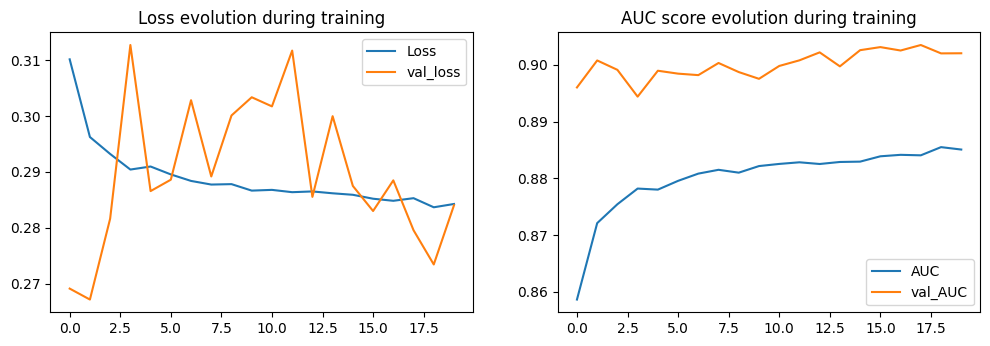

In [107]:
plot_learning_evolution(r)

In [108]:
y_train_pred = model.predict(X_train)
evaluate_ann(y_train, y_train_pred.round(),train=True)

8192/8192 ━━━━━━━━━━━━━━━━━━━━ 16s 2ms/step
Train Result:
Accuracy Score: 88.52%
___________________________________________________________________
CLASSIFICATION REPORT:
               0.0       1.0  accuracy  macro avg  weighted avg
precision     0.82      0.89      0.89       0.86          0.88
recall        0.53      0.97      0.89       0.75          0.89
f1-score      0.65      0.93      0.89       0.79          0.88
support   51665.00 210478.00      0.89  262143.00     262143.00
___________________________________________________________________
Confusion Matrix: 
 [[ 27459  24206]
 [  5876 204602]]



In [109]:
y_test_pred = model.predict(X_test)
evaluate_ann(y_test, y_test_pred.round(),train=False)

4076/4076 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step
Test Result:
Accuracy Score: 88.48%
___________________________________________________________________
CLASSIFICATION REPORT:
               0.0       1.0  accuracy  macro avg  weighted avg
precision     0.82      0.89      0.88       0.86          0.88
recall        0.53      0.97      0.88       0.75          0.88
f1-score      0.64      0.93      0.88       0.79          0.87
support   25480.00 104943.00      0.88  130423.00     130423.00
___________________________________________________________________
Confusion Matrix: 
 [[ 13462  12018]
 [  3011 101932]]



In [110]:
scores_dict = {
    'ANNs': {
        'Train': roc_auc_score(y_train, model.predict(X_train)),
        'Test': roc_auc_score(y_test, model.predict(X_test)),
    },

}

8192/8192 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step
4076/4076 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step


✔ #**XGBoost Classifier**

In [111]:
# param_grid = dict(
#    n_estimators=stats.randint(10, 500),
#    max_depth=stats.randint(1, 10),
#    learning_rate=stats.uniform(0, 1)
# )

xgb_clf = XGBClassifier(use_label_encoder = False)
# xgb_cv = RandomizedSearchCV(
#    xgb_clf, param_grid, cv=3, n_iter=60,
#    scoring='roc_auc', n_jobs=-1, verbose=1
# )
# xgb_cv.fit(X_train, y_train)

# best_params = xgb_cv.best_params_
# best_params['tree_method'] = 'gpu_hist'
# # best_params = {'n_estimators': 50, 'tree_method': 'gpu_hist'}
# print(f"Best Parameters: {best_params}")

# xgb_clf = XGBClassifier(**best_params)
xgb_clf.fit(X_train, y_train)

y_train_pred = xgb_clf.predict(X_train)
y_test_pred = xgb_clf.predict(X_test)

print_score(y_train, y_train_pred, train=True)
print_score(y_test, y_test_pred, train=False)


Train Result:
Accuracy Score: 89.62%
___________________________________________________________________
CLASSIFICATION REPORT:
               0.0       1.0  accuracy  macro avg  weighted avg
precision     0.95      0.89      0.90       0.92          0.90
recall        0.50      0.99      0.90       0.75          0.90
f1-score      0.66      0.94      0.90       0.80          0.88
support   51665.00 210478.00      0.90  262143.00     262143.00
___________________________________________________________________
Confusion Matrix: 
 [[ 25932  25733]
 [  1490 208988]]

Test Result:
Accuracy Score: 88.90%
___________________________________________________________________
CLASSIFICATION REPORT:
               0.0       1.0  accuracy  macro avg  weighted avg
precision     0.91      0.89      0.89       0.90          0.89
recall        0.48      0.99      0.89       0.73          0.89
f1-score      0.63      0.93      0.89       0.78          0.87
support   25480.00 104943.00      0.89  13042

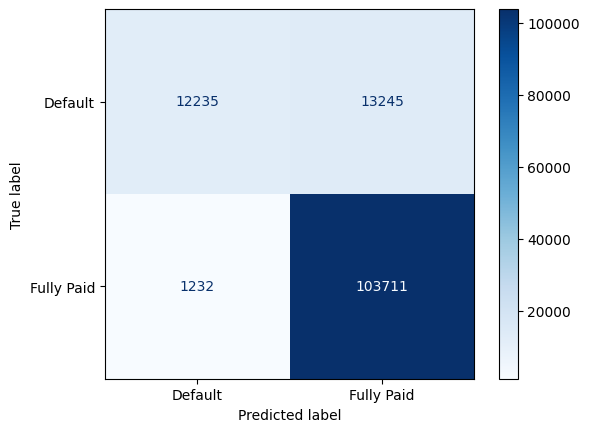

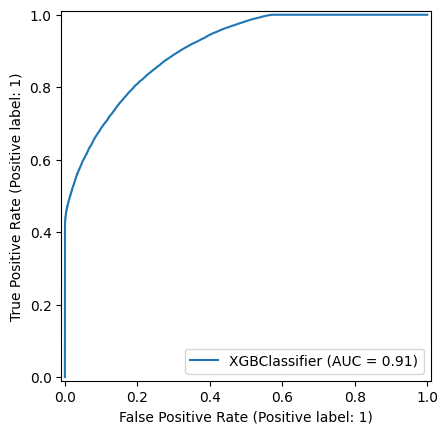

In [112]:
disp = ConfusionMatrixDisplay.from_estimator(
    xgb_clf, X_test, y_test,
    cmap='Blues', values_format='d',
    display_labels=['Default','Fully Paid']
    )

disp = RocCurveDisplay.from_estimator(
    xgb_clf, X_test, y_test
)

In [113]:
scores_dict['XGBoost'] = {
    'Train': roc_auc_score(y_train, xgb_clf.predict(X_train)),
    'Test': roc_auc_score(y_test, xgb_clf.predict(X_test)),
}

**✔ Random Forest Classifier**

In [114]:
# param_grid = dict(
#     n_estimators=stats.randint(100, 1500),
#     max_depth=stats.randint(10, 100),
#     min_samples_split=stats.randint(1, 10),
# )

rf_clf = RandomForestClassifier(n_estimators=100)
# rf_cv = RandomizedSearchCV(
#     rf_clf, param_grid, cv=3, n_iter=60,
#     scoring='roc_auc', n_jobs=-1, verbose=1
# )
# rf_cv.fit(X_train, y_train)
# best_params = rf_cv.best_params_
# print(f"Best Parameters: {best_params}")
# rf_clf = RandomForestClassifier(**best_params)
rf_clf.fit(X_train, y_train)

y_train_pred = rf_clf.predict(X_train)
y_test_pred = rf_clf.predict(X_test)

print_score(y_train, y_train_pred, train=True)
print_score(y_test, y_test_pred, train=False)

Train Result:
Accuracy Score: 100.00%
___________________________________________________________________
CLASSIFICATION REPORT:
               0.0       1.0  accuracy  macro avg  weighted avg
precision     1.00      1.00      1.00       1.00          1.00
recall        1.00      1.00      1.00       1.00          1.00
f1-score      1.00      1.00      1.00       1.00          1.00
support   51665.00 210478.00      1.00  262143.00     262143.00
___________________________________________________________________
Confusion Matrix: 
 [[ 51663      2]
 [     0 210478]]

Test Result:
Accuracy Score: 88.88%
___________________________________________________________________
CLASSIFICATION REPORT:
               0.0       1.0  accuracy  macro avg  weighted avg
precision     0.95      0.88      0.89       0.92          0.90
recall        0.45      0.99      0.89       0.72          0.89
f1-score      0.62      0.94      0.89       0.78          0.87
support   25480.00 104943.00      0.89  1304

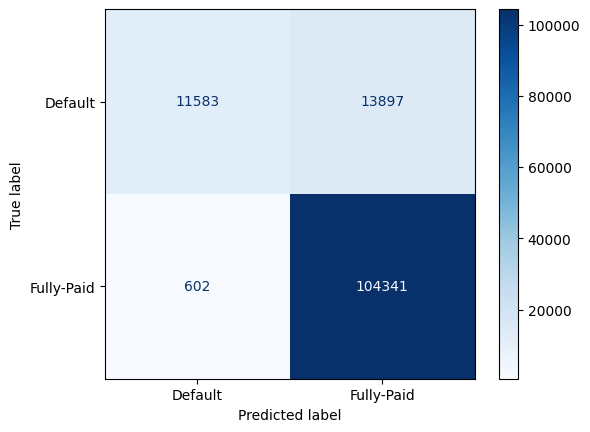

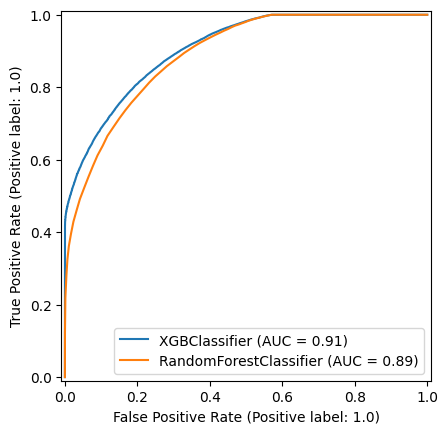

In [115]:
disp = ConfusionMatrixDisplay.from_estimator(
    rf_clf, X_test, y_test,
    cmap='Blues', values_format='d',
    display_labels=['Default','Fully-Paid'])

disp = RocCurveDisplay.from_estimator(
    xgb_clf, X_test, y_test)
RocCurveDisplay.from_estimator(rf_clf, X_test, y_test, ax=disp.ax_)

In [116]:
scores_dict['Random Forest'] = {
    'Train': roc_auc_score(y_train, rf_clf.predict(X_train)),
    'Test': roc_auc_score(y_test, rf_clf.predict(X_test)),
}

📊 **Comparing Models Performance**

In [117]:
ml_models = {
    'Random Forest': rf_clf,
    'XGBoost': xgb_clf,
    'ANNs': model
}

for model in ml_models:
    print(f"{model.upper():{30}} roc_auc_score: {roc_auc_score(y_test, ml_models[model].predict(X_test)):.3f}")

RANDOM FOREST                  roc_auc_score: 0.724
XGBOOST                        roc_auc_score: 0.734
4076/4076 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step
ANNS                           roc_auc_score: 0.902


In [118]:
scores_df = pd.DataFrame(scores_dict)
scores_df.hvplot.barh(
    width=500, height=400,
    title="ROC Scores of ML Models", xlabel="ROC Scores",
    alpha=0.4, legend='top'
)

:Bars   [index,Variable]   (value)